In [79]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:
# Importing loan csv as a dataframe
df = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
# Analysing the head of the dataframe to get a high level understanding of the data
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Displaying the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
dict(df.dtypes)

{'id': dtype('int64'),
 'member_id': dtype('int64'),
 'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'url': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('O'),
 'total_acc': dtyp

In [6]:
# List of columns having NULL values

column_df = pd.DataFrame({
    'columns': df.columns,
    'missing_perc': (df.isnull().sum() * 100 / len(df)).round(1)
})

column_df = column_df.reset_index(drop=True)

# null columns: column_df[column_df.missing_perc == 100.0]

print("Count of NULL columns", (column_df[column_df.missing_perc == 100.0]).count().columns)
print("NULL columns are listed below:")
column_df[column_df.missing_perc == 100.0]['columns']

Count of NULL columns 54
NULL columns are listed below:


50        mths_since_last_major_derog
53                   annual_inc_joint
54                          dti_joint
55          verification_status_joint
57                       tot_coll_amt
58                        tot_cur_bal
59                        open_acc_6m
60                         open_il_6m
61                        open_il_12m
62                        open_il_24m
63                 mths_since_rcnt_il
64                       total_bal_il
65                            il_util
66                        open_rv_12m
67                        open_rv_24m
68                         max_bal_bc
69                           all_util
70                   total_rev_hi_lim
71                             inq_fi
72                        total_cu_tl
73                       inq_last_12m
74               acc_open_past_24mths
75                        avg_cur_bal
76                     bc_open_to_buy
77                            bc_util
80                 mo_sin_old_il_acct
81          

In [7]:
# removing null columns from df
null_columns = (column_df[column_df.missing_perc == 100.0])['columns']
df = df.drop(null_columns, axis=1)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
# remove columns that have all values same as it does not influence results
cl_unique=df.nunique()
print('cl_unique', cl_unique)
cl=cl_unique[cl_unique.values == 1]
print('Columns with only single value which does not impact the analysis', cl)
df.drop(columns = list(cl.index), inplace=True)
df.shape

cl_unique id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths    

(39717, 48)

The company wants to identify the risk of the applicants, so the values created after approval of loan are not useful for the analysis. the fields which are unique for each applicant like id, member_id, url are also not useful for the analysis. Zipcode values are not fully available and hence this is also not much useful here. Dropping these values help us to monitor the important values closer. 

In [9]:
del_cols = ["id","member_id","url","zip_code","out_prncp_inv","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","emp_title"]
df.drop(columns= del_cols, inplace=True)
df.shape

(39717, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  desc                    26777 non-null

<AxesSubplot:ylabel='Count'>

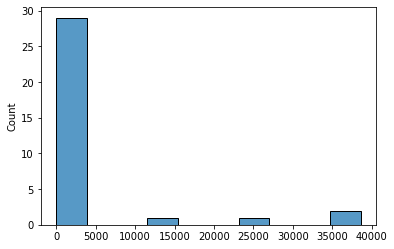

In [11]:
# Identifying columns with null values
null_val=df.isnull().sum()
sns.histplot(data=null_val, bins=10)


### Insights
From the above graph we can see that there are some columns that have more than 10,000 null values i.e, more than 25% are null

In [12]:
# dropping the columns having null values more than 25%

df.drop(columns=list(null_val[null_val.values >10000].index), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [14]:
#Int_rate and revol_util has percentage in the values, lets remove percentage
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [15]:
# Evaluating "emp_length"
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [16]:
#formatting emp_length column to convert '10+yrs to 10', '< 1 years to 1' and convert values to numeric to use it for analysis
df['emp_length'] = df['emp_length'].replace('10+ years', '10 years' )
df['emp_length'] = df['emp_length'].replace('< 1 year', '0 years' )
df['emp_length']= df.emp_length.str.extract('(\d+)')

In [17]:
df['emp_length'].value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [18]:
# checking the null values in emp_length,revol_util
print(df.emp_length.isnull().sum())
print(df.revol_util.isnull().sum())

1075
50


In [19]:
#dropping off the null values for emp_length and revol_util as the count is very less comapred to the total data frame
df=df[~(df['emp_length'].isnull())]
df=df[~(df['revol_util'].isnull())]

In [20]:
#convert amount columns to numeric data to find correlation
cols=['loan_amnt', 'funded_amnt', 'int_rate', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'emp_length']
df[cols] = df[cols].apply(pd.to_numeric)

In [21]:
#extracting month and year from issue_d
df.issue_d= pd.to_datetime(df.issue_d, format= '%b-%y')
df['issue_year']= df['issue_d'].dt.year
df['issue_month']= df['issue_d'].dt.month

In [22]:
#dropping account status with current as the ongoing loan application will not be of much use to our analysis.
#converting loan_status to numeric: assigning 1 for defaulted loans and 0 for paid off
df['loan_status'].value_counts()

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64

In [23]:
df = df[~(df['loan_status']== 'Current')]
df.shape

(37497, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37497 non-null  int64         
 1   funded_amnt           37497 non-null  int64         
 2   funded_amnt_inv       37497 non-null  float64       
 3   term                  37497 non-null  object        
 4   int_rate              37497 non-null  float64       
 5   installment           37497 non-null  float64       
 6   grade                 37497 non-null  object        
 7   sub_grade             37497 non-null  object        
 8   emp_length            37497 non-null  int64         
 9   home_ownership        37497 non-null  object        
 10  annual_inc            37497 non-null  float64       
 11  verification_status   37497 non-null  object        
 12  issue_d               37497 non-null  datetime64[ns]
 13  loan_status     

In [25]:
# Evaluating title
df.title.value_counts()

Debt Consolidation                         2052
Debt Consolidation Loan                    1586
Personal Loan                               623
Consolidation                               484
debt consolidation                          459
                                           ... 
Interest rate creeping up on the cards        1
Dept Con                                      1
Promote music Album                           1
LoPrestiLoan                                  1
Moving Expenses - Safe Investment             1
Name: title, Length: 18818, dtype: int64

In [26]:
# Since title has a lot of unique values, we can drop this column as this is not significant
df.drop(columns=['title'], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37497 non-null  int64         
 1   funded_amnt           37497 non-null  int64         
 2   funded_amnt_inv       37497 non-null  float64       
 3   term                  37497 non-null  object        
 4   int_rate              37497 non-null  float64       
 5   installment           37497 non-null  float64       
 6   grade                 37497 non-null  object        
 7   sub_grade             37497 non-null  object        
 8   emp_length            37497 non-null  int64         
 9   home_ownership        37497 non-null  object        
 10  annual_inc            37497 non-null  float64       
 11  verification_status   37497 non-null  object        
 12  issue_d               37497 non-null  datetime64[ns]
 13  loan_status     

In [28]:
# Evaluating "pub_rec_bankruptcies"
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    35266
1.0     1529
NaN      697
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [29]:
# Removing the rows with Null values as this is a significant variable 
# and we don't have a value to impute which will not skew the results
df=df[~(df['pub_rec_bankruptcies'].isnull())]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt           36800 non-null  int64         
 2   funded_amnt_inv       36800 non-null  float64       
 3   term                  36800 non-null  object        
 4   int_rate              36800 non-null  float64       
 5   installment           36800 non-null  float64       
 6   grade                 36800 non-null  object        
 7   sub_grade             36800 non-null  object        
 8   emp_length            36800 non-null  int64         
 9   home_ownership        36800 non-null  object        
 10  annual_inc            36800 non-null  float64       
 11  verification_status   36800 non-null  object        
 12  issue_d               36800 non-null  datetime64[ns]
 13  loan_status     

In [31]:
#Correlation Matrix
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
loan_amnt,1.000000,0.981578,0.951973,0.299814,0.931165,0.148522,0.270172,0.060025,-0.034761,0.011216,0.174466,-0.047159,0.315970,0.255641,NaN,0.881824,-0.031905,0.115445,0.053286
funded_amnt,0.981578,1.000000,0.971404,0.303900,0.957282,0.148393,0.266185,0.060146,-0.034827,0.011312,0.173114,-0.047597,0.308901,0.250066,NaN,0.898962,-0.032856,0.128374,0.043386
funded_amnt_inv,0.951973,0.971404,1.000000,0.294318,0.923653,0.155796,0.257221,0.063226,-0.038683,0.000162,0.163023,-0.051503,0.292590,0.241105,NaN,0.885340,-0.037785,0.215678,0.058601
int_rate,0.299814,0.303900,0.294318,1.000000,0.275831,-0.001835,0.047641,0.107563,0.158821,0.135633,0.008649,0.098928,0.096476,-0.046081,NaN,0.289716,0.083131,0.026425,0.023139
installment,0.931165,0.957282,0.923653,0.275831,1.000000,0.122086,0.269179,0.050030,-0.023088,0.008952,0.170321,-0.042607,0.312126,0.229992,NaN,0.858424,-0.029493,0.060601,0.032351
emp_length,0.148522,0.148393,0.155796,-0.001835,0.122086,1.000000,0.111931,0.048523,0.014746,0.009569,0.096810,0.064538,0.150950,0.206992,NaN,0.131285,0.062577,0.110183,0.020631
annual_inc,0.270172,0.266185,0.257221,0.047641,0.269179,0.111931,1.000000,-0.123553,0.021222,0.034581,0.156305,-0.014411,0.276163,0.236350,NaN,0.257465,-0.012418,0.014542,0.008989
dti,0.060025,0.060146,0.063226,0.107563,0.050030,0.048523,-0.123553,1.000000,-0.034962,0.000675,0.290169,-0.005436,0.227999,0.228279,NaN,0.057503,0.006438,0.080613,0.008258
delinq_2yrs,-0.034761,-0.034827,-0.038683,0.158821,-0.023088,0.014746,0.021222,-0.034962,1.000000,0.008404,0.011153,0.010929,-0.056344,0.067006,NaN,-0.025458,0.005801,0.004251,-0.011652
inq_last_6mths,0.011216,0.011312,0.000162,0.135633,0.008952,0.009569,0.034581,0.000675,0.008404,1.000000,0.094285,0.023190,-0.024636,0.115205,NaN,-0.008831,0.014244,-0.058662,0.016301


In [32]:
# evaluating "out_prncp"
df.out_prncp.value_counts()

0.0    36800
Name: out_prncp, dtype: int64

In [33]:
# Remove column out_prncp as this has only one value
df.drop(columns=['out_prncp'], inplace=True)

In [34]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
loan_amnt,1.000000,0.981578,0.951973,0.299814,0.931165,0.148522,0.270172,0.060025,-0.034761,0.011216,0.174466,-0.047159,0.315970,0.255641,0.881824,-0.031905,0.115445,0.053286
funded_amnt,0.981578,1.000000,0.971404,0.303900,0.957282,0.148393,0.266185,0.060146,-0.034827,0.011312,0.173114,-0.047597,0.308901,0.250066,0.898962,-0.032856,0.128374,0.043386
funded_amnt_inv,0.951973,0.971404,1.000000,0.294318,0.923653,0.155796,0.257221,0.063226,-0.038683,0.000162,0.163023,-0.051503,0.292590,0.241105,0.885340,-0.037785,0.215678,0.058601
int_rate,0.299814,0.303900,0.294318,1.000000,0.275831,-0.001835,0.047641,0.107563,0.158821,0.135633,0.008649,0.098928,0.096476,-0.046081,0.289716,0.083131,0.026425,0.023139
installment,0.931165,0.957282,0.923653,0.275831,1.000000,0.122086,0.269179,0.050030,-0.023088,0.008952,0.170321,-0.042607,0.312126,0.229992,0.858424,-0.029493,0.060601,0.032351
emp_length,0.148522,0.148393,0.155796,-0.001835,0.122086,1.000000,0.111931,0.048523,0.014746,0.009569,0.096810,0.064538,0.150950,0.206992,0.131285,0.062577,0.110183,0.020631
annual_inc,0.270172,0.266185,0.257221,0.047641,0.269179,0.111931,1.000000,-0.123553,0.021222,0.034581,0.156305,-0.014411,0.276163,0.236350,0.257465,-0.012418,0.014542,0.008989
dti,0.060025,0.060146,0.063226,0.107563,0.050030,0.048523,-0.123553,1.000000,-0.034962,0.000675,0.290169,-0.005436,0.227999,0.228279,0.057503,0.006438,0.080613,0.008258
delinq_2yrs,-0.034761,-0.034827,-0.038683,0.158821,-0.023088,0.014746,0.021222,-0.034962,1.000000,0.008404,0.011153,0.010929,-0.056344,0.067006,-0.025458,0.005801,0.004251,-0.011652
inq_last_6mths,0.011216,0.011312,0.000162,0.135633,0.008952,0.009569,0.034581,0.000675,0.008404,1.000000,0.094285,0.023190,-0.024636,0.115205,-0.008831,0.014244,-0.058662,0.016301


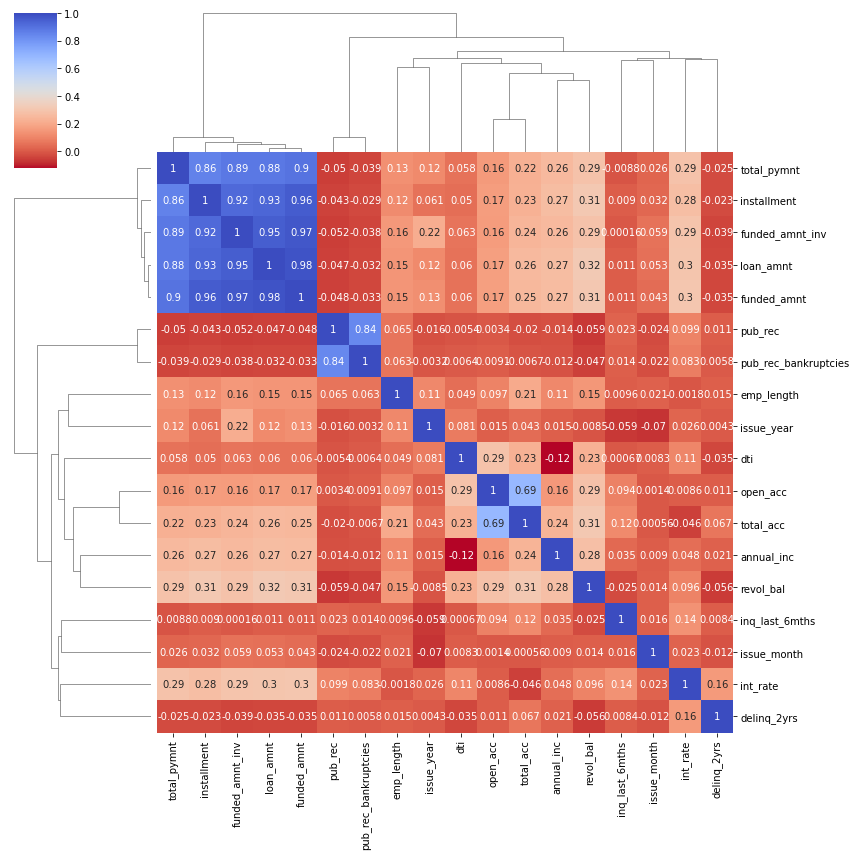

In [35]:
#Correlation Matrix
sns.clustermap(data=df.corr(), cmap='coolwarm_r', figsize=(12,12), annot=True)
plt.show()

In [36]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,5863.155187,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,1008.710000,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,3005.666844,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,12231.890000,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,5632.210000,0.0,2011,12


In [37]:
#Evaluating pub_rec_bankruptcies
df.pub_rec_bankruptcies.isnull().sum()

0

In [38]:
#finding missing values in the columns
missing_values = round(100*(df.isnull().sum()/len(df.loan_amnt)))
missing_values[missing_values !=0]

Series([], dtype: float64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt           36800 non-null  int64         
 2   funded_amnt_inv       36800 non-null  float64       
 3   term                  36800 non-null  object        
 4   int_rate              36800 non-null  float64       
 5   installment           36800 non-null  float64       
 6   grade                 36800 non-null  object        
 7   sub_grade             36800 non-null  object        
 8   emp_length            36800 non-null  int64         
 9   home_ownership        36800 non-null  object        
 10  annual_inc            36800 non-null  float64       
 11  verification_status   36800 non-null  object        
 12  issue_d               36800 non-null  datetime64[ns]
 13  loan_status     

#### All Null Values removed as per above info

In [40]:
# Evaluating 'earliest_cr_line'
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [41]:
# Converting 'earliest_cr_line' to date format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')

In [42]:
# Splitting the earliest_cr_line to Month and Year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [43]:
# Evaluating earliest_cr_line_month
df['earliest_cr_line_month'].value_counts().sort_index()

1     3202
2     2642
3     2565
4     2531
5     2688
6     2732
7     2829
8     3080
9     3334
10    3797
11    3647
12    3753
Name: earliest_cr_line_month, dtype: int64

In [44]:
# Evaluating earliest_cr_line_year
df['earliest_cr_line_year'].value_counts().sort_index()

1969      26
1970      37
1971      38
1972      34
1973      45
1974      53
1975      66
1976      74
1977      98
1978     136
1979     137
1980     157
1981     160
1982     194
1983     303
1984     364
1985     407
1986     448
1987     565
1988     670
1989     787
1990     948
1991     894
1992     976
1993    1387
1994    1862
1995    1985
1996    2113
1997    2292
1998    2668
1999    2805
2000    3036
2001    2385
2002    1814
2003    1750
2004    1668
2005    1425
2006    1115
2007     677
2008     144
2046       1
2050       1
2054       1
2056       1
2062       3
2063       4
2064       3
2065       6
2066       8
2067      15
2068      14
Name: earliest_cr_line_year, dtype: int64

In [45]:
# Some values of the years are in future which seem like flawed data, hence need to be imputed with reasonable values
print('No of rows with year more than 2021:',len(df[df['earliest_cr_line_year'] > 2021 ]))


No of rows with year more than 2021: 57


In [46]:
# Our assumption is that there is a chance that while conversion, some 1900s got converted to 2000s
# hence reducing 100 yrs from the data which has year beyond 2021
df.loc[df['earliest_cr_line_year'] > 2021 , 'earliest_cr_line_year'] = df['earliest_cr_line_year'] - 100
print('No of rows with year more than 2021:',len(df[df['earliest_cr_line_year'] > 2021 ]))

No of rows with year more than 2021: 0


In [47]:
#exporting the cleaned data to the master file
df.to_csv('clean_data.csv', encoding='utf-8', index=False)

## Checking for outliers and Univariate Analysis

In [48]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year
count,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,3.680000e+04,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000
mean,11149.540761,10880.794837,10439.055845,11.983745,324.906537,4.964293,6.943448e+04,13.334529,0.146141,0.869755,9.302473,0.054185,13373.771658,22.152120,12000.654704,0.041821,2010.349620,7.157473,6.894266,1996.762636
std,7369.855703,7109.157574,7008.522880,3.701182,208.891979,3.552080,6.402159e+04,6.650154,0.491844,1.068063,4.375839,0.235562,15848.564286,11.407797,8854.568117,0.200859,0.815516,3.380273,3.539345,6.625604
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2007.000000,1.000000,1.000000,1946.000000
25%,5500.000000,5400.000000,5000.000000,8.940000,167.730000,2.000000,4.113300e+04,8.220000,0.000000,0.000000,6.000000,0.000000,3728.750000,14.000000,5572.034728,0.000000,2010.000000,4.000000,4.000000,1994.000000
50%,10000.000000,9600.000000,9000.000000,11.830000,280.110000,4.000000,6.000000e+04,13.430000,0.000000,1.000000,9.000000,0.000000,8867.500000,20.000000,9815.269906,0.000000,2011.000000,7.000000,7.000000,1998.000000
75%,15000.000000,15000.000000,14350.000000,14.460000,429.365000,9.000000,8.300000e+04,18.590000,0.000000,1.000000,12.000000,0.000000,17028.000000,29.000000,16303.695000,0.000000,2011.000000,10.000000,10.000000,2001.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,2.000000,2011.000000,12.000000,12.000000,2008.000000


In [49]:
# Function to draw a boxplot 
def drawBoxPlot(col_name,x_label):
    # @Params
    # col_name : column to be ploted
    # x_label: Label on the x_axis
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col_name], palette='flare')
    plt.xlabel(x_label)
    plt.show()
    
# Function to create range for quantitative variables: low, medium, high, very high
def convertToRange(val,col,data=df):
    # @Params
    # val : value to be evaluated
    # col : name of the column val belongs to
    # data: overall dataframe/dataset
    
    iqr = (data[col].quantile(0.75) - data[col].quantile(0.25)).round(2)
    quant_25 = data[col].quantile(0.25).round(2)
    quant_75 = data[col].quantile(0.75).round(2)
    
    if val <= dquant_25: #25%ile range
        return 'low 0-'+ str(quant_25)
    if val > quant_25 and val <= quant_75: #25%ile to 75%ile
        return 'medium ' + str(quant_25)+ '-' + str(quant_75)
    if val > quant_75 and val <= (quant_75 + 1.5*iqr) : #75%ile to "q3 + 1.5*iqr"
        return 'high ' + str(quant_75)+ '-' + str(quant_75 + 1.5*iqr)
    return 'very high ' + str(quant_75 + 1.5*iqr) + '+'

# Function to draw a count plot wrt to loan status => 0: defaulted, 1: Fully paid
def drawBarWithLoanStatus(col, figsize=(10,5),data=df):
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.countplot(data=data, y=col, hue='loan_status', ax=ax, order=data[col].value_counts().sort_index().index)
    plt.show(g)

### 1. loan_status

In [50]:
df.loan_status.value_counts(dropna=False)

Fully Paid     31534
Charged Off     5266
Name: loan_status, dtype: int64

In [51]:
# Converting "loan_status" from variables to continuous variable

# Change Fully Paid to 1 and Charged Off to 0
df["loan_status_code"] = df["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)

In [52]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year,loan_status_code
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.155187,0.0,2011,12,1,1985,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.710000,0.0,2011,12,4,1999,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.666844,0.0,2011,12,11,2001,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21,37,12231.890000,0.0,2011,12,2,1996,1
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.210000,0.0,2011,12,11,2004,1


#### Insights
- Majority of the loans are fully paid off
- 14.31% loans have been defaulted on

### 2. loan_amnt

In [53]:
df['loan_amnt'].describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

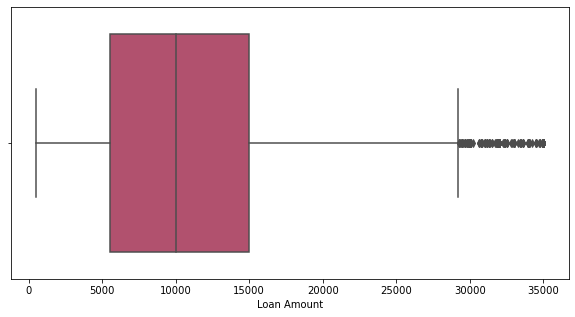

In [54]:
drawBoxPlot('loan_amnt', 'Loan Amount')

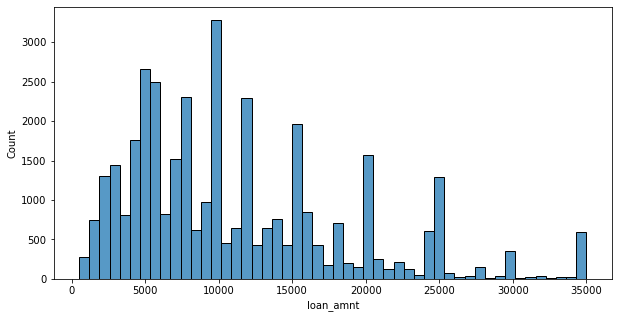

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['loan_amnt'], bins=50)
plt.show()

#### Insights
- Mean and Median values are fairly alike (~10000)
- Loan amount varies from 500 to 35000 USD

### 2. funded_amnt

In [56]:
df['funded_amnt'].describe()

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

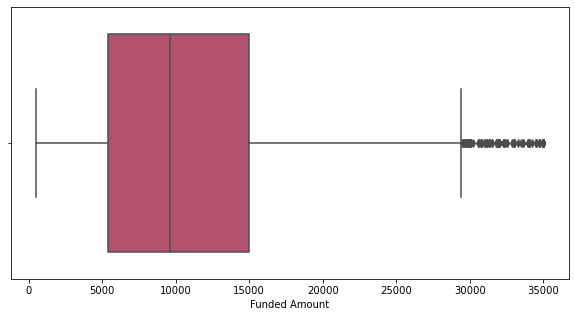

In [57]:
drawBoxPlot("funded_amnt", 'Funded Amount')

#### Insights
- Mean and Median values are fairly alike (~10000)

### 3. funded_amnt_inv

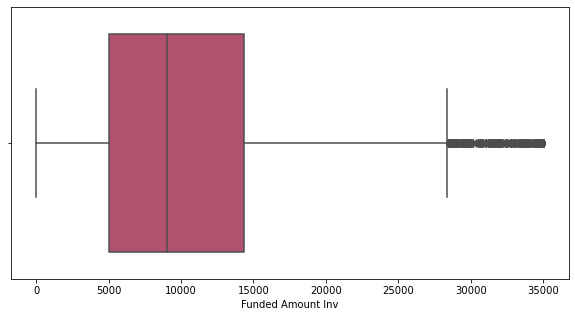

In [58]:

drawBoxPlot("funded_amnt_inv", 'Funded Amount Inv')

In [59]:
df["funded_amnt_inv"].describe()

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [60]:
df["funded_amnt_inv"].value_counts()

5000.000000     1237
10000.000000    1224
6000.000000     1143
12000.000000    1001
8000.000000      856
                ... 
19401.105310       1
20789.980600       1
7363.934748        1
13789.311550       1
34972.352450       1
Name: funded_amnt_inv, Length: 7596, dtype: int64

#### Insights
- Mean and Median values are fairly alike (~10000)

### 4. term

In [61]:
df.term.value_counts()

 36 months    27546
 60 months     9254
Name: term, dtype: int64

In [62]:
# removing months text from the values
df['term'] = df.term.apply(lambda x: x.replace(' months',''))

In [63]:
df.term.value_counts()

 36    27546
 60     9254
Name: term, dtype: int64

#### Insights
- Majority of the loans are taken for a period of 36 months (74.85%)

### 5. int_rate

In [64]:
df['int_rate'].value_counts()

10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
9.01       1
17.54      1
16.96      1
10.46      1
12.36      1
Name: int_rate, Length: 336, dtype: int64

In [65]:
df['int_rate'].describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

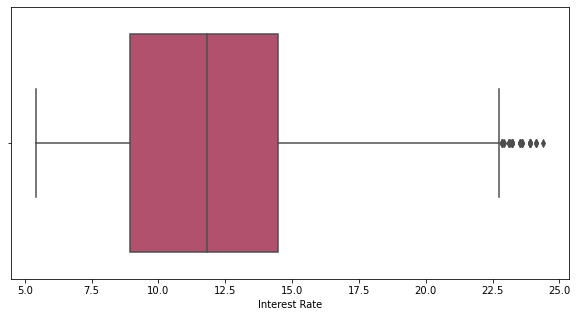

In [66]:
drawBoxPlot("int_rate", 'Interest Rate')

### 6. installment

In [67]:
df['installment'].describe()

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64

In [68]:
#df['installment'].quantile(0.97)

In [69]:
df['installment'].value_counts()

311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
211.64     1
378.24     1
720.65     1
480.71     1
339.26     1
Name: installment, Length: 14385, dtype: int64

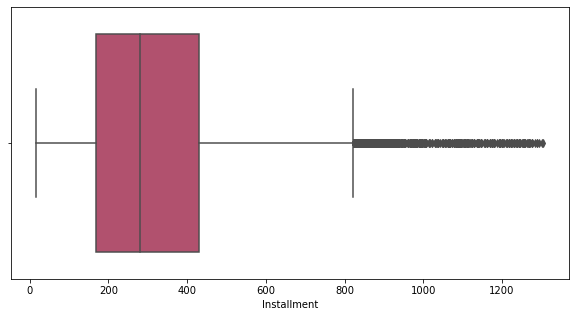

In [70]:
drawBoxPlot("installment", 'Installment')

In [71]:
# Since there is a significant diff between the 75 %ile and the max value, we should study for outliers

installment_q3 = df.installment.quantile(0.75)
installment_q1 = df.installment.quantile(0.25)
iqr = installment_q3 - installment_q1

perc_check = df[df['installment'] > (installment_q3 + 1.5*iqr)].installment.count()/df.installment.count() *100
# installment_q3 + 1.5*iqr => 821.8175
print("Percentage of values beyond 'Q3 + 1.5 IQR'is:",perc_check.round(2),"%")
# if perc_check is more than 1% then remove the outliers
# OR
# We can convert installment from a continuous variable to a categorical variable to derive better insights

Percentage of values beyond 'Q3 + 1.5 IQR'is: 3.33 %


In [73]:
# Function to create range of installments: low, medium, high, very high
df['installment_range'] = df['installment'].apply(lambda x: convertToRange(x,'installment'))

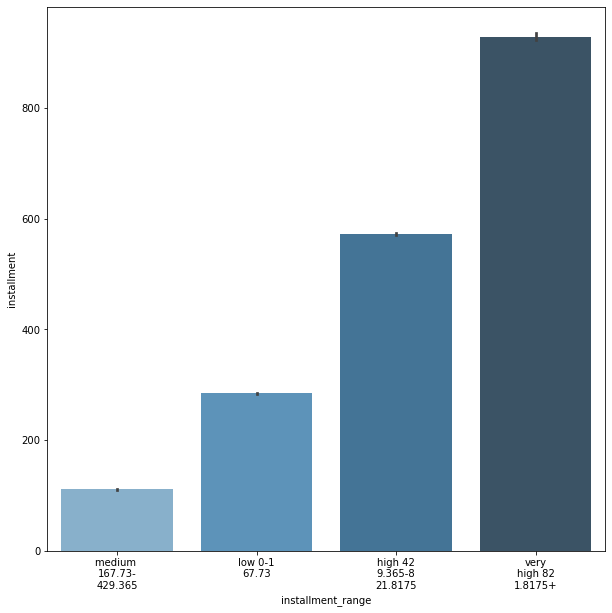

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x="installment_range", y="installment", data=df, palette="Blues_d")
ax.set_xticklabels([textwrap.fill(e, 7) for e in df['installment_range'].value_counts().index])
plt.show(g)

### 7. emp_length

In [74]:
df['emp_length'].value_counts()

10    8368
0     4329
2     4202
3     3947
4     3290
5     3157
1     3071
6     2133
7     1686
8     1408
9     1209
Name: emp_length, dtype: int64

In [75]:
df['emp_length'].describe()

count    36800.000000
mean         4.964293
std          3.552080
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

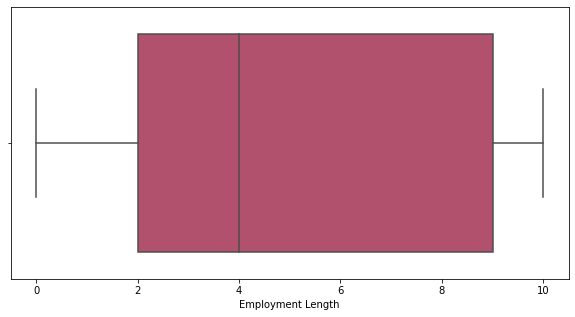

In [76]:
drawBoxPlot('emp_length','Employment Length')

### 8. annual_inc

In [77]:
df['annual_inc'].describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

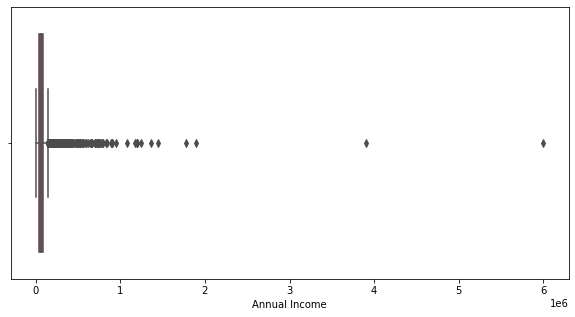

In [78]:
drawBoxPlot('annual_inc', "Annual Income")

In [79]:
# Since max value is 100 times the mean and median, we should study for outliers

annual_inc_q3 = df.annual_inc.quantile(0.75)
annual_inc_q1 = df.annual_inc.quantile(0.25)
iqr = annual_inc_q3 - annual_inc_q1

perc_check = df[df['annual_inc'] > (annual_inc_q3 + 1.5*iqr)].annual_inc.count()/df.annual_inc.count() *100
# annual_inc_q3 + 1.5*iqr => 821.8175
print("Percentage of values beyond 'Q3 + 1.5 IQR'is:",perc_check.round(2),"%", annual_inc_q3 + 1.5*iqr)

Percentage of values beyond 'Q3 + 1.5 IQR'is: 4.63 % 145800.5


In [80]:
#Removing values above 95%ile or more than Q3 + 1.5 IQR
df = df[df['annual_inc']<df['annual_inc'].quantile(0.95)]
df['annual_inc'].describe()

count     34959.000000
mean      61538.580818
std       27712.202134
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

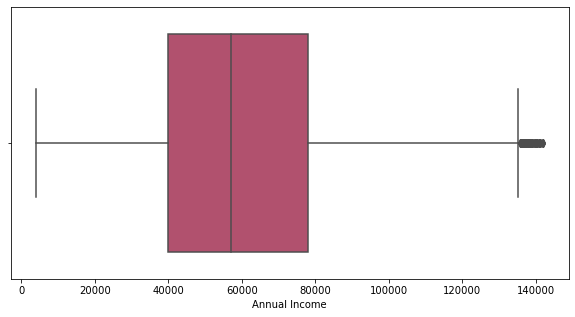

In [81]:
drawBoxPlot('annual_inc', "Annual Income")

### 9. dti

In [82]:
df['dti'].describe()

count    34959.000000
mean        13.506418
std          6.641076
min          0.000000
25%          8.430000
50%         13.640000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

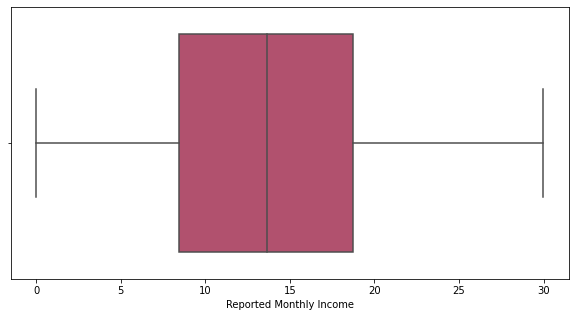

In [83]:
drawBoxPlot('dti', 'Reported Monthly Income')

### 10. revol_bal

In [84]:
df['revol_bal'].describe()

count     34959.000000
mean      12399.848794
std       13776.048468
min           0.000000
25%        3629.000000
50%        8615.000000
75%       16240.000000
max      149000.000000
Name: revol_bal, dtype: float64

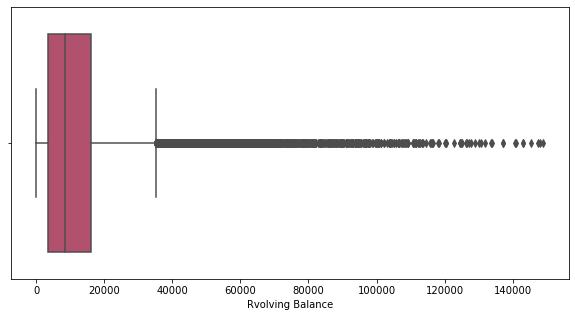

In [85]:
drawBoxPlot('revol_bal', 'Rvolving Balance')

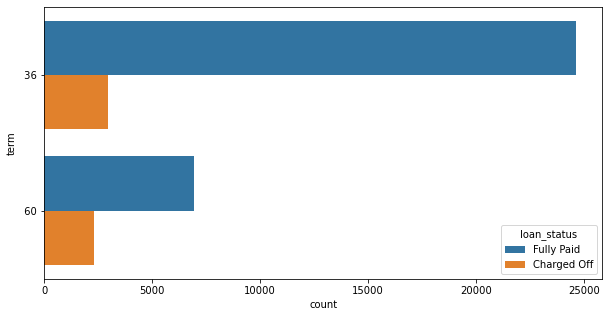

In [86]:
drawBarWithLoanStatus("term")

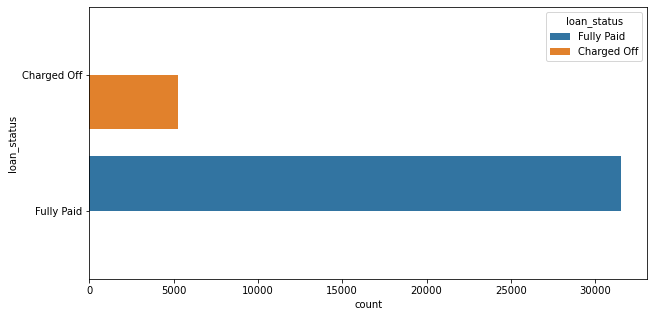

In [87]:
drawBarWithLoanStatus("loan_status")

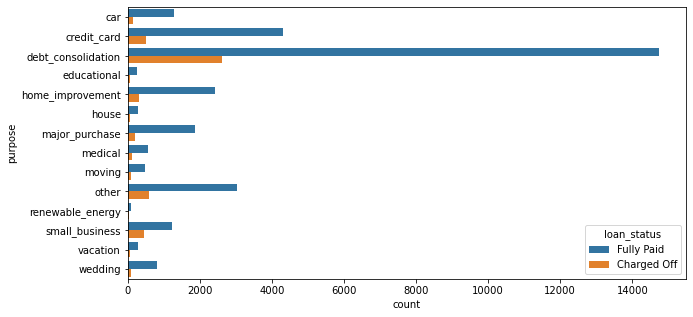

In [88]:
drawBarWithLoanStatus("purpose")

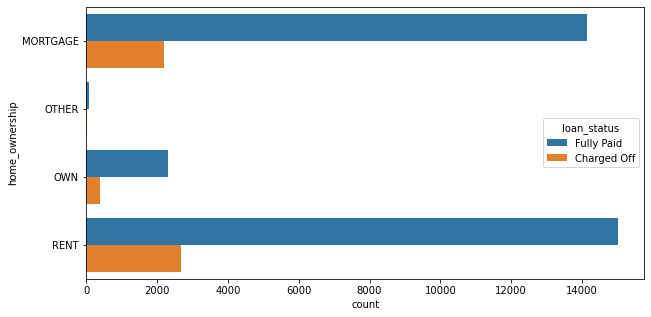

In [89]:
drawBarWithLoanStatus("home_ownership")

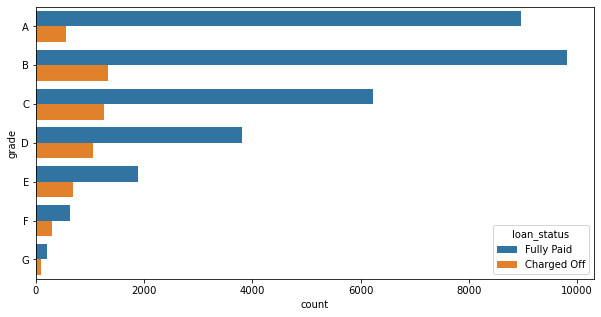

In [90]:
drawBarWithLoanStatus("grade")

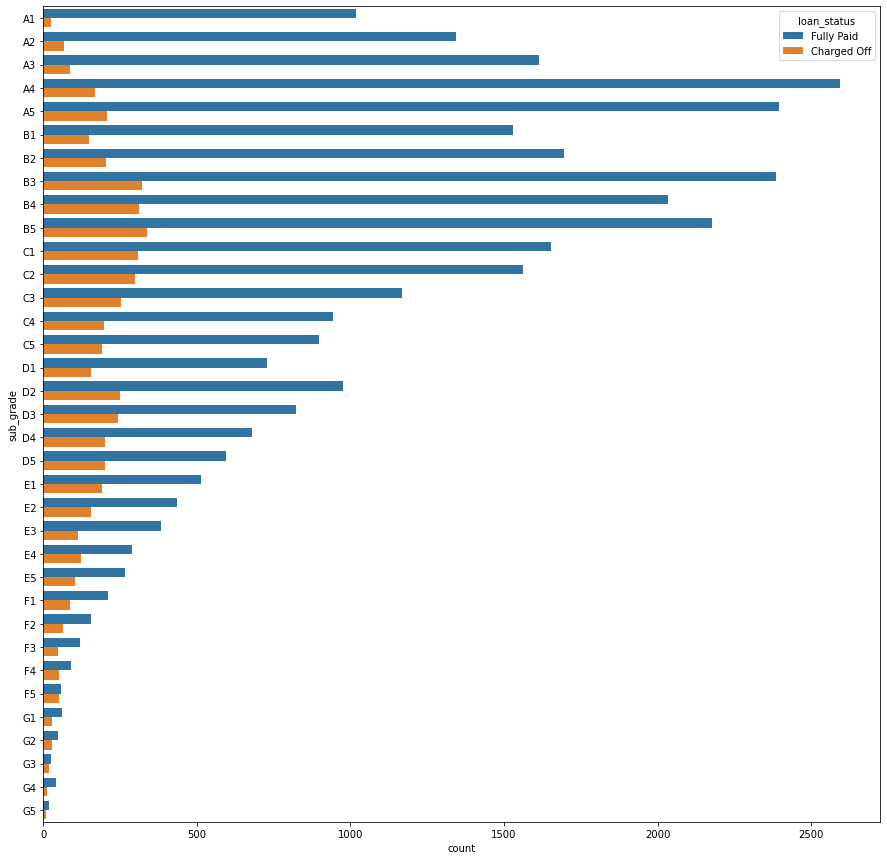

In [91]:
drawBarWithLoanStatus("sub_grade", figsize=(15,15))

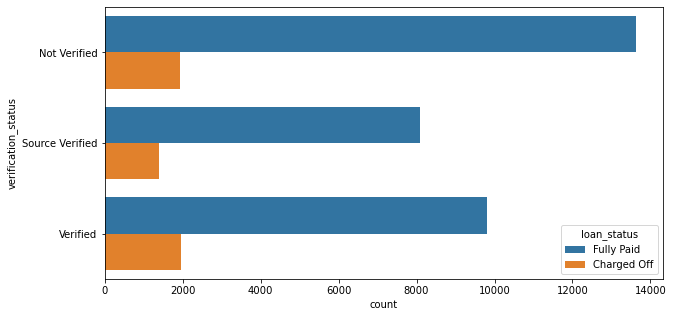

In [92]:
drawBarWithLoanStatus("verification_status")

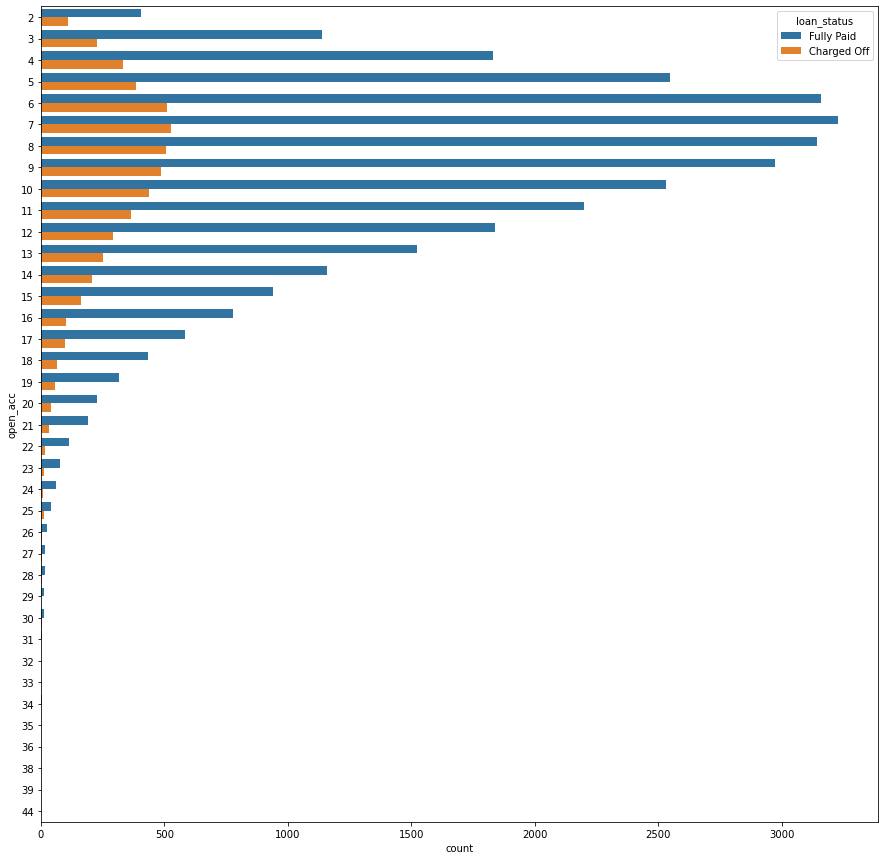

In [93]:
drawBarWithLoanStatus("open_acc", figsize=(15,15))

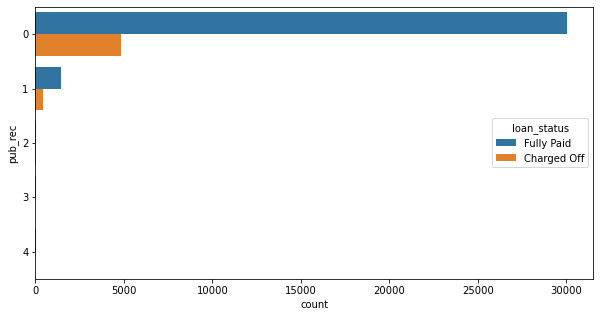

In [94]:
drawBarWithLoanStatus("pub_rec")

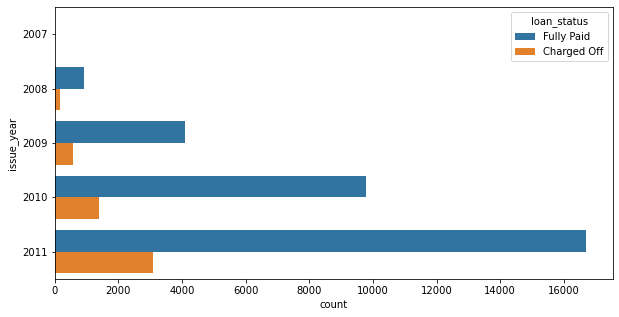

In [95]:
drawBarWithLoanStatus("issue_year")

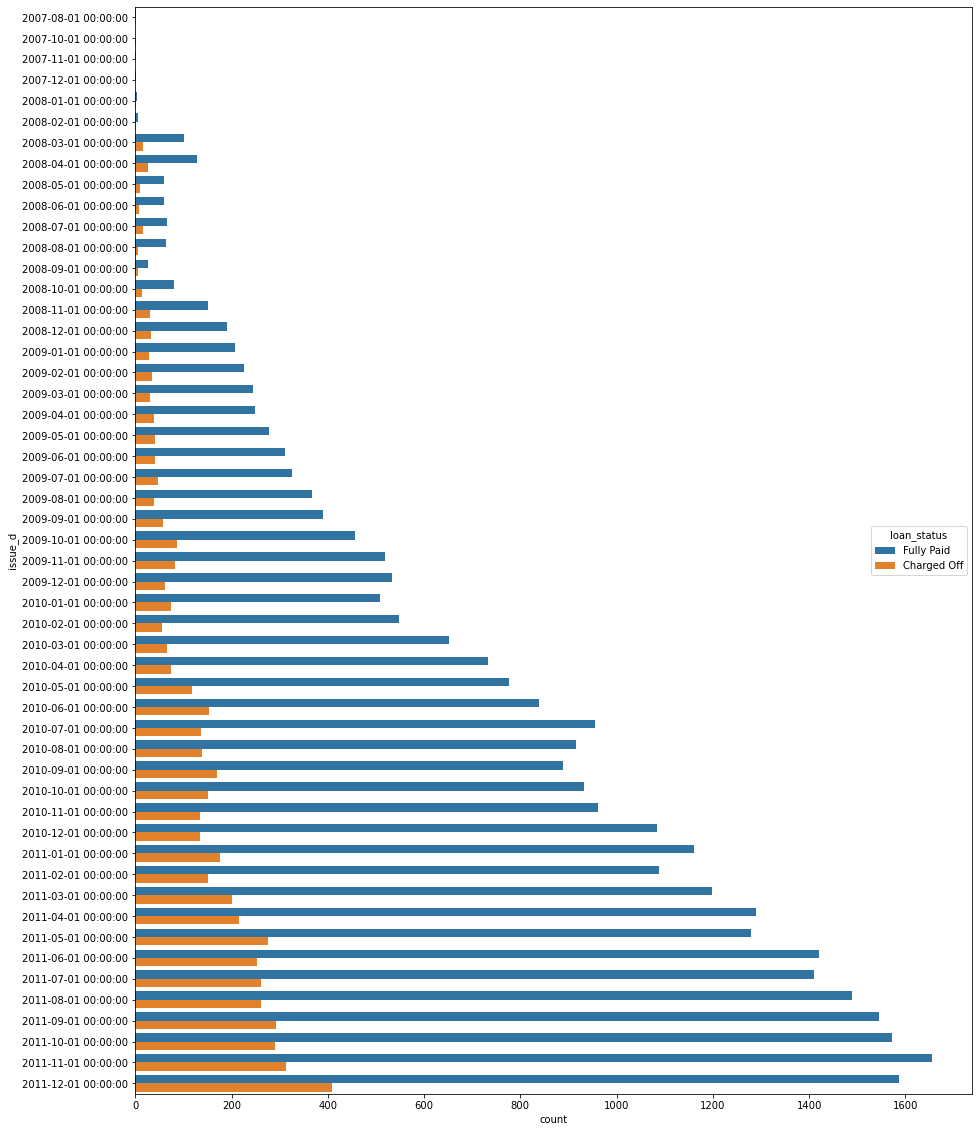

In [96]:
drawBarWithLoanStatus("issue_d", figsize=(15,20))

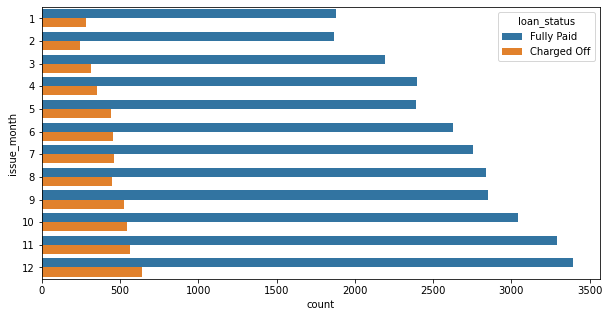

In [97]:
drawBarWithLoanStatus("issue_month")

In [98]:
df.loan_amnt_range = df['loan_amnt'].apply(lambda x: convertToRange(x,'loan_amnt'))

<ipython-input-98-37ccaa878c36>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.loan_amnt_range = df['loan_amnt'].apply(lambda x: convertToRange(x,'loan_amnt'))


In [ ]:
df['loan_amnt_range'].count()

In [100]:
def drawScatterPlot(col_1, col_2, data=df):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=col_1, y=col_2, hue="loan_status", data=data)
    plt.title("Scatter plot: " + col_1 + " & " + col_2)
    plt.show()

In [ ]:
df.annual_inc_range = df['annual_inc'].apply(lambda x: convertToRange(x,'annual_inc'))
drawScatterPlot("int_rate", "annual_inc_range")